In [271]:
!conda install -c conda-forge hdbsca

^C


In [ ]:
!conda install cython
!conda install numpy scipy
!conda install scikit-learn
!pip install hdbscan

Solving environment: ...working... done

# All requested packages already installed.





==> WARNING: A newer version of conda exists. <==
  current version: 4.12.0
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [267]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns


ModuleNotFoundError: No module named 'hdbscan'

In [229]:
df = pd.read_csv('feedback.csv')


In [230]:
df.drop(df.columns[[0,11,19,20,21,22]],inplace=True,axis=1)

In [231]:
df2 = df.copy()
df2.columns = ['email','disciplina','nome_docente','destaque_docente','materiais_ensino','duvidas','didatica','prazo_feedback','avaliacao','materiais_extra','curso','ano','situacao_disciplina','presenca','duvidas_professor','duvidas_grupo','desempenho']
df.columns = ['email','disciplina','nome_docente','destaque_docente','materiais_ensino','duvidas','didatica','prazo_feedback','avaliacao','materiais_extra','curso','ano','situacao_disciplina','presenca','duvidas_professor','duvidas_grupo','desempenho']

In [232]:
df2['disciplina_professor'] = df2['disciplina'] + ' - ' + df2['nome_docente']

In [233]:
df2['duvidas_grupo'].value_counts()

duvidas_grupo
Nunca              127
Raramente           18
Eventualmente        8
Frequentemente       2
Muito frequente      1
Name: count, dtype: int64

In [234]:
colunas_criterios_professor = ['materiais_ensino','duvidas','didatica','prazo_feedback','avaliacao','materiais_extra']
colunas_criterio_aluno = ['presenca','duvidas_professor','duvidas_grupo']

In [235]:
df2

,email,disciplina,nome_docente,destaque_docente,materiais_ensino,duvidas,didatica,prazo_feedback,avaliacao,materiais_extra,curso,ano,situacao_disciplina,presenca,duvidas_professor,duvidas_grupo,desempenho,disciplina_professor
0,luiz.mello@estudante.ufscar.br,Algoritmos e Estruturas de Dados 2,Alexandre Luis Magalhães Levada,5,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Ciência da Computação,2022,Já fui aprovado(a) (M > 6),Frequentemente,Eventualmente,Nunca,50% da atuação docente e 50% da atuação discente,Algoritmos e Estruturas de Dados 2 - Alexandre...
1,anaoliveira22@estudante.ufscar.br,Aprendizado de Máquina 1,Murilo Coelho Naldi,4,Bom,Ruim,Regular,Regular,Bom,Ruim,Ciência da Computação,2021,Não foi possível definir (não houve feedback s...,Frequentemente,Nunca,Nunca,50% da atuação docente e 50% da atuação discente,Aprendizado de Máquina 1 - Murilo Coelho Naldi
2,lucas@estudante.ufscar.br,Aprendizado de Máquina 1,Murilo Coelho Naldi,5,Excelente,Regular,Excelente,Excelente,Excelente,Excelente,Engenharia da Computação,2019,Ainda não fui aprovado(a) mas posso ser com as...,Frequentemente,Raramente,Nunca,50% da atuação docente e 50% da atuação discente,Aprendizado de Máquina 1 - Murilo Coelho Naldi
3,luiz.mello@estudante.ufscar.br,Arquitetura e Organização de Computadores 1,Marcio Merino Fernandes,5,Excelente,Bom,Bom,Excelente,Bom,Excelente,Ciência da Computação,2022,Ainda não fui aprovado(a) mas posso ser com as...,Frequentemente,Eventualmente,Nunca,50% da atuação docente e 50% da atuação discente,Arquitetura e Organização de Computadores 1 - ...
4,anaoliveira22@estudante.ufscar.br,Computação Gráfica,Murillo Rodrigo Petrucelli Homem,2,Regular,Péssimo,Ruim,Péssimo,Bom,Péssimo,Ciência da Computação,2021,Não foi possível definir (não houve feedback s...,Frequentemente,Nunca,Nunca,100% da atuação discente,Computação Gráfica - Murillo Rodrigo Petrucell...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,rasilva@estudante.ufscar.br,Tecnologias de Comunicação,Paulo Matias,5,Excelente,Excelente,Excelente,Excelente,Excelente,Excelente,Engenharia da Computação,2020,Já fui aprovado(a) (M > 6),Muito frequente,Muito frequente,Nunca,50% da atuação docente e 50% da atuação discente,Tecnologias de Comunicação - Paulo Matias
152,rasilva@estudante.ufscar.br,Redes de Computadores,Hermes Senger,3,Bom,Excelente,Regular,Excelente,Excelente,Não se aplica,Engenharia da Computação,2020,Já fui aprovado(a) (M > 6),Muito frequente,Eventualmente,Nunca,100% da atuação discente,Redes de Computadores - Hermes Senger
153,viniciusborges@estudante.ufscar.br,Construção de Compiladores,Daniel Lucrédio,5,Excelente,Excelente,Bom,Excelente,Excelente,Bom,Ciência da Computação,2020,Já fui aprovado(a) (M > 6),Muito frequente,Frequentemente,Nunca,100% da atuação discente,Construção de Compiladores - Daniel Lucrédio
154,viniciusborges@estudante.ufscar.br,Projeto e Implementação de Banco de Dados,Marilde Terezinha Prado Santos,1,Bom,Bom,Regular,Péssimo,Ruim,Bom,Ciência da Computação,2020,Não foi possível definir (não houve feedback s...,Muito frequente,Eventualmente,Nunca,50% da atuação docente e 50% da atuação discente,Projeto e Implementação de Banco de Dados - Ma...


In [236]:
for i in colunas_criterios_professor:
    df2[i] = df2[i].map({'Excelente': 5,'Bom':4,'Regular':3,'Ruim':2,'Péssimo': 1, 'Não se aplica': 0})
    
for i in colunas_criterio_aluno:
    df2[i] = df2[i].map({'Nunca':1,'Raramente':2,'Eventualmente':3,'Frequentemente':4,'Muito frequente':5})

In [237]:
colunas_criterios_professor.append('destaque_docente')

In [238]:
media = df2.groupby('disciplina_professor')[colunas_criterios_professor].agg('median')
media['media_total'] = (media['destaque_docente']+media['materiais_ensino'] + media['duvidas'] + media['didatica'] + media['prazo_feedback'] + media['avaliacao'] + media['materiais_extra'])/7

In [239]:
media

,materiais_ensino,duvidas,didatica,prazo_feedback,avaliacao,materiais_extra,destaque_docente,media_total
disciplina_professor,,,,,,,,
Algoritmos e Estruturas de Dados 1 - Auri Marcelo Rizzo Vincenzi,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Algoritmos e Estruturas de Dados 2 - Alexandre Luis Magalhães Levada,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.000000
Algoritmos e Estruturas de Dados 2 - Mário César San Felice,5.0,4.5,4.5,3.5,5.0,4.5,4.5,4.500000
Aprendizado de Máquina 1 - Murilo Coelho Naldi,4.5,3.0,4.0,3.0,4.0,3.0,4.5,3.714286
Arquitetura e Organização de Computadores 1 - Marcio Merino Fernandes,5.0,4.0,4.0,5.0,5.0,5.0,5.0,4.714286
Arquiteturas de Alto Desempenho - Emerson Carlos Pedrino,5.0,4.5,4.5,4.5,5.0,3.0,4.5,4.428571
Circuitos Elétricos - Mauricio Fernandes Figueiredo,3.0,1.0,2.0,3.0,2.0,2.0,3.0,2.285714
Computação Gráfica - Murillo Rodrigo Petrucelli Homem,4.0,2.0,2.5,1.0,2.0,2.0,3.0,2.357143
Construção de Algoritmos e Programação - Jander Moreira,5.0,5.0,5.0,4.0,5.0,4.0,5.0,4.714286


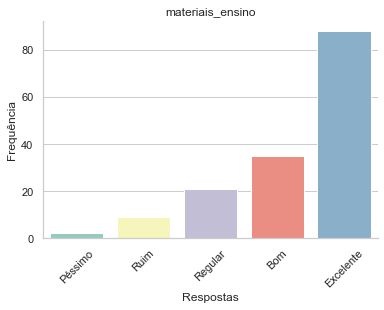

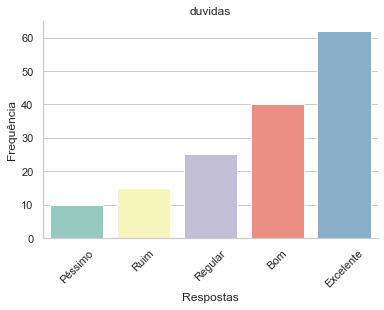

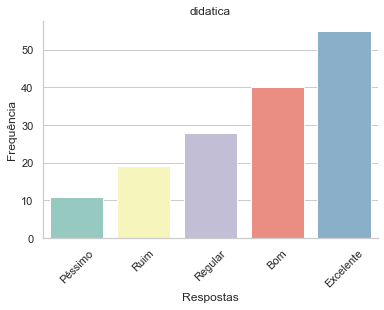

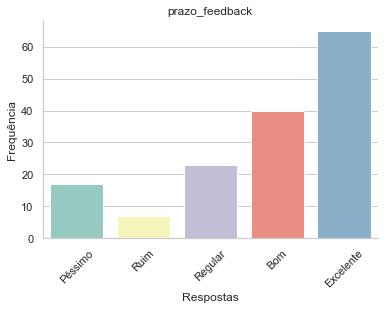

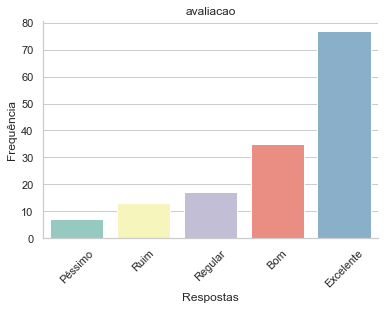

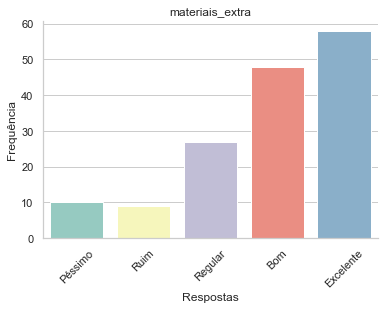

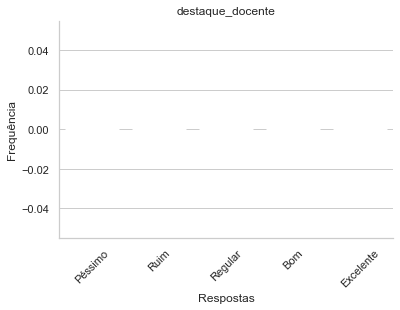

In [240]:

ordem_respostas = ["Péssimo", "Ruim", "Regular", "Bom", "Excelente"]

for i in colunas_criterios_professor:
    sns.set(style="whitegrid")
    ax = sns.countplot(x=i, data=df[df[i] != 'Não se aplica'], palette="Set3",order=ordem_respostas)

    # Adicionando título e rótulos aos eixos
    ax.set_title(i)
    ax.set_xlabel("Respostas")
    ax.set_ylabel("Frequência")
    plt.xticks(rotation=45)
    # Exibindo o gráfico
    sns.despine()
    plt.show()
    fig = ax.get_figure()
    fig.savefig(f'barra_{i}.png', dpi=300)


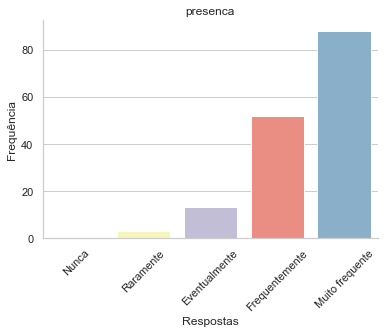

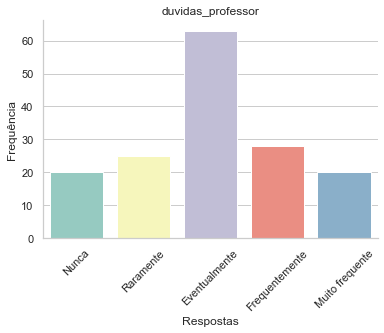

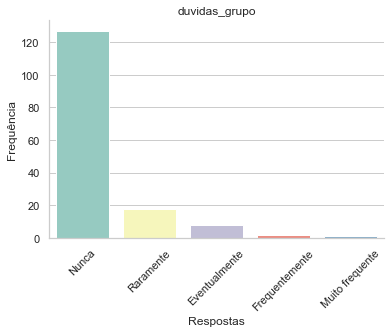

In [241]:
ordem_respostas = ['Nunca','Raramente','Eventualmente','Frequentemente','Muito frequente']

for i in colunas_criterio_aluno:
    sns.set(style="whitegrid")
    ax = sns.countplot(x=i, data=df, palette="Set3",order=ordem_respostas)

    # Adicionando título e rótulos aos eixos
    ax.set_title(i)
    ax.set_xlabel("Respostas")
    ax.set_ylabel("Frequência")
    plt.xticks(rotation=45)
    # Exibindo o gráfico
    sns.despine()
    plt.show()
    fig = ax.get_figure()
    fig.savefig(f'barra_{i}.png', dpi=300)

In [251]:
df3 = df2.drop(['email','disciplina','nome_docente','desempenho','situacao_disciplina','disciplina_professor'],axis=1)
df3

,destaque_docente,materiais_ensino,duvidas,didatica,prazo_feedback,avaliacao,materiais_extra,curso,ano,presenca,duvidas_professor,duvidas_grupo
0,5,5,5,5,5,5,5,Ciência da Computação,2022,4,3,1
1,4,4,2,3,3,4,2,Ciência da Computação,2021,4,1,1
2,5,5,3,5,5,5,5,Engenharia da Computação,2019,4,2,1
3,5,5,4,4,5,4,5,Ciência da Computação,2022,4,3,1
4,2,3,1,2,1,4,1,Ciência da Computação,2021,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
151,5,5,5,5,5,5,5,Engenharia da Computação,2020,5,5,1
152,3,4,5,3,5,5,0,Engenharia da Computação,2020,5,3,1
153,5,5,5,4,5,5,4,Ciência da Computação,2020,5,4,1
154,1,4,4,3,1,2,4,Ciência da Computação,2020,5,3,1


In [253]:
df3 = pd.get_dummies(df3, columns=['curso'])